In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from pandas import DataFrame as pd

In [2]:
def centresSetting(df, centres):
    # np.random.seed(30)
    centroids = pd({
        "x": [np.random.randint(np.max(df["x"])) / 1 for i in range(centres)],
        "y": [np.random.randint(np.max(df["y"])) / 1 for i in range(centres)]
    })
    return centroids 
    

def setWorkList(df, centres):
    workList = pd({
        "x": [df["x"][i] for i in range(len(df))],
        "y": [df["y"][i] for i in range(len(df))] 
    })
    
    for i in range(len(centres)):
        workList[f"distFrom{i}"] = (
            np.sqrt(
                (df["x"] - centres["x"][i]) ** 2 
                + (df["y"] - centres["y"][i]) ** 2
        )
    )
    workList["minrange"] = [np.min(workList.loc[s, f"distFrom{0}":f"distFrom{len(centres) - 1}"]) for s in range(len(workList))]
    workList["closest"] = [np.where(((workList.loc[i, f"distFrom{0}":f"distFrom{len(centres) - 1}"]) == workList.loc[i, "minrange"]).to_numpy().astype(np.int8) == 1)[-1][-1] for i in range(len(workList))]
    return workList


def plotCentresAndWorklist(w, c):
    colrs = list(colors.BASE_COLORS.keys())
    if not w.empty:
        for i in range(len(w)):
            plt.plot(w["x"][i], w["y"][i], colrs[w['closest'][i]]+"x")
    if not c.empty:
        for i in range(len(c)):
            plt.plot(c["x"][i], c["y"][i], colrs[i]+"o")
    return plt.show()    


def updateCentroids(df, centroids):
    oldCentroids = pd.copy(centroids)
    for i in range(len(centroids)):
        centroids["x"][i] = np.mean(df[df["closest"] == i]["x"])
        centroids["y"][i] = np.mean(df[df["closest"] == i]["y"])
    return centroids, oldCentroids


def main(df, centres):
    initialCentroids = centresSetting(df = df, centres = centres)
    workList = setWorkList(df = df, centres = initialCentroids)
    newCentroids, oldCentroids = updateCentroids(df = workList, centroids = initialCentroids)

    iters = 0
    while True:
        workList = setWorkList(df = workList, centres = newCentroids)
        newCentroids, oldCentroids = updateCentroids(df = workList, centroids = newCentroids)
        iters += 1
        if newCentroids.equals(oldCentroids):
            return workList, newCentroids, oldCentroids, iters

In [3]:
dots = np.array([
    [2, 3, 1, 2, 4, 1, 3, 5, 4, 3, 6, 5, 9, 11, 13, 14, 15, 15, 15, 16, 17, 14, 13, 17, 16, 17, 15, 14, 15, 14, 14, 14, 14, 16, 17, 18, 16, 16, 19, 21, 22, 23, 21, 22, 24, 22, 20], \
    [15, 15, 14, 13, 13, 12, 11, 12, 10, 7, 7, 5, 11, 13, 15, 15, 16, 13, 15, 16, 17, 17, 17, 14, 13, 11, 10, 7, 6, 6, 5, 4, 1, 5, 5, 4, 4, 2, 3, 6, 6, 6, 7, 7, 7, 8, 6]
    ])
dfDots = pd({
    "x" : dots[0],
    "y" : dots[1]
    })

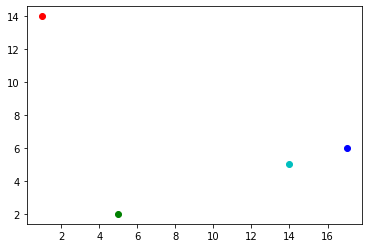

In [43]:
centres = centresSetting(df = dfDots, centres = 4)
plotCentresAndWorklist(w = pd(columns=["pass"]), c = centres)

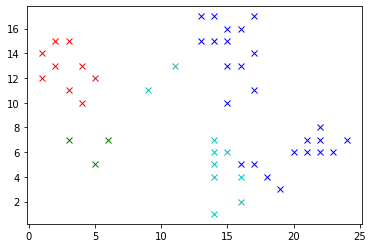

In [44]:
workList = setWorkList(df = dfDots, centres = centres)
plotCentresAndWorklist(w = workList, c = pd(columns=["pass"]))

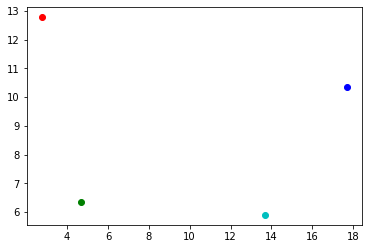

In [45]:
newCentres, oldCentres = updateCentroids(df = workList, centroids = centres)
plotCentresAndWorklist(w = pd(columns=["pass"]), c = newCentres)

Обновлённые центры кластеров:
            x          y
0   2.625000  13.125000
1  14.857143  14.428571
2  18.100000   5.250000
3   5.400000   8.000000
Центры кластеров на предыдущей итерации:
            x          y
0   2.625000  13.125000
1  14.857143  14.428571
2  18.100000   5.250000
3   5.400000   8.000000
Количество итераций: 4


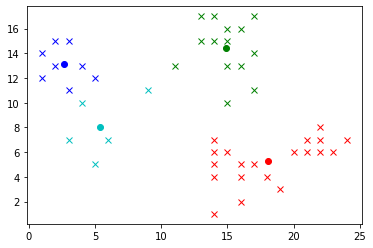

In [46]:
workList, centroids, oldcentroids, iters = main(df = dfDots, centres = 4)
print("Обновлённые центры кластеров:\n", centroids)
print("Центры кластеров на предыдущей итерации:\n", oldcentroids)
print("Количество итераций:", iters)
plotCentresAndWorklist(w = workList, c = centroids)